# Universidade Federal do ABC - UFABC
## Centro de Matemática, Computação e Cognição - CMCC

## Disciplina: Visão Computacional e Processamento de Imagens

Responsável: Prof. Dr. Francisco Zampirolli

Estudante: [Bruno Aristimunha](https://github.com/bruAristimunha).

Santo André, Terceiro Quadrimestre de 2019

### Projeto Final da Disciplina

#### Classificação de Grão de Pólen.

## Definição do Problema

Os grãos de pólen são importantes marcadores geológicos e geográficos presentes em todo o globo. Suas aplicações são diversas, mas dentre as mais comuns podemos citar o uso para a perícia investigativa, o mapeamento do clima em função de milhares de anos e estudos alérgicos, além da produção de alimentos à base de mel. Em todas as áreas citadas, para que se obtenha resultados significativos de análises robustas, faz-se necessário o levantamento estatístico da distribuição dos tipos de pólen presentes em uma amostra.

Considerando a diversidade, as semelhanças interespécies e características microscópicas, o reconhecimento de cada espécie demanda uma ampla e longa formação botânica. O processo de aquisição está exposto a seguir na Figura 1.
![aquisicao](https://github.com/bruAristimunha/data/raw/master/2.png)

#### Figura 01: Processo de aquisição dos grãos de pólen. Inicialmente a amostra é capturada em uma lâmina, há ampliação da imagem no microscópio posteriormente, busca-se focalizar o grão e estudar sua morfologia, classificando a espécie.

O processo não trivial de aquisição da imagem demanda tempo, custos em materiais, além de técnica e anos de experiência para classificação. Ademais, dependendo do material usado para aquisição pode haver visualizações distintas para a mesma espécie de pólen. A Figura 2 mostra a diferença entre metodologias de captura de imagens.

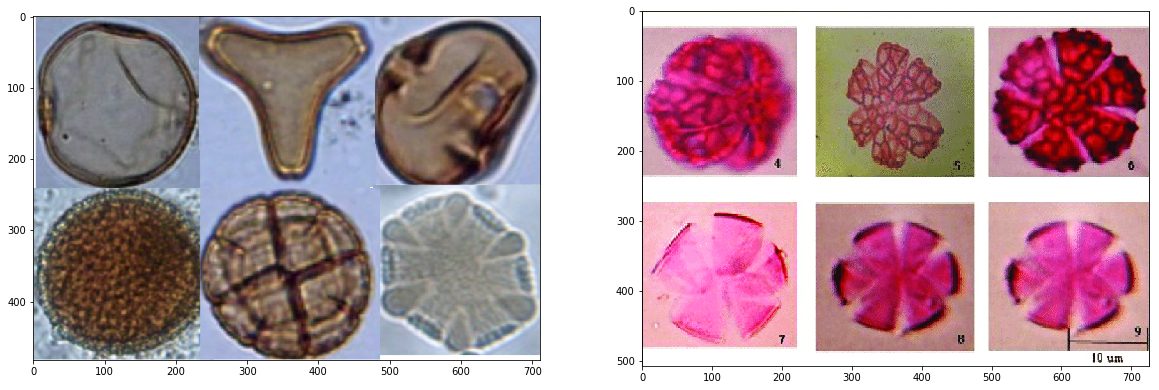

In [26]:
from skimage import io
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/bruAristimunha/data/master/capa_site.jpeg"
url1 =  'https://raw.githubusercontent.com/bruAristimunha/data/master/figure.png'

fig = plt.figure(figsize=(20,20))

image = io.imread(url)
image1 = io.imread(url1)

plt.subplot(221).imshow(image)
plt.subplot(222).imshow(image1)
plt.show()


#### Figura 02: A diferença entre solventes gera uma coloração totalmente distinta quando visualizada no microscópio, empecilhos como esses dificultam a generalização da classificação do biólogo.


O aprendizado profundo é o conjunto de técnicas comumente utilizadas em visão computacional para busca de
representações hierárquicas de dados. Métodos de camadas convolucionais, permitem solucionar inúmeros problemas da visão computacional pela sua invariância translacional e conectividade local. Em outras palavras, empregamos esse conjunto de técnicas para buscar padrões de formação desconhecidos a priori pelo classificador, que só será descoberto durante o aprendizado.

## Dados/imagens

Será utilizado um banco de imagens de polens nativos do Mato Grosso do Sul. Por se tratar de um objeto de geometria tridimensional, as diferentes angulações influenciam tanto na classificação do especialista quanto em algoritmos tradicionais de classificação, portanto cada grão possui 35 imagens distintas.

O conjunto de dados possui [23](http://palinovic.weebly.com/bancos-de-imagens.html) classes balanceadas, com um total de 805 imagens. Técnicas de aumento de dados nas imagens serão largamente empregadas. Optou-se pelo aumento de dados empregando rotações de 45º, traçando um paralelo com a literatura botânica, que emprega rotações de 45º na captura de imagens. Por se tratar de um objeto de geometria tridimensional levantou-se a hipótese de que essas rotações auxiliariam na generalização dos métodos. Será considerada a divisão: treino, validação e teste, sendo 60, 20 e 20 a porcentagem de cada uma de acordo com a quantidade de imagens. 


## Processamento de imagens


https://www.google.com/search?q=reprodutibility+in+computer+science+jupyter&oq=reprodutibility+in+computer+science+jupyter&aqs=chrome..69i57j33.9207j0j7&sourceid=chrome&ie=UTF-8


https://keras.io/applications/#resnet

https://github.com/jupyter-guide/ten-rules-jupyter/blob/e7b184c4949d164ce12eb5fdfbc8c8cd487b8a23/example2/0-Workflow.ipynb

https://github.com/nteract/papermill



In [7]:
#Bibliotecas empregadas na análise

from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping


#Biblioteca para impressão do versionamento das bibliotecas importadas. Importante para reprodutibilidade do trabalho
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [5]:

%watermark
%watermark --iversions

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
2019-11-06T17:35:49-03:00

CPython 3.6.8
IPython 5.5.0

compiler   : GCC 8.3.0
system     : Linux
release    : 5.0.0-32-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 12
interpreter: 64bit
keras   2.2.4
IPython 5.5.0



In [ ]:
img_width, img_height = 299, 299
train_data_dir = "../data/train"
validation_data_dir = "../data/validation"
batch_size = 16
epochs = 100

model = applications.InceptionV3(weights = "imagenet", include_top=False, 
                                 input_shape = (img_width, img_height, 3))

#Adding custom Layers
x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(23, activation="softmax")(x)

# creating the final model
model_final = Model(input = model.input, output = predictions)

# compile the model
model_final.compile(loss = "categorical_crossentropy", 
                    optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), 
                    metrics=["accuracy"])

# Initiate the train and test generators with data Augumentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    horizontal_flip=True,
                                    fill_mode="nearest",
                                    zoom_range=0.3,
                                    width_shift_range=0.3,
                                    height_shift_range=0.3,
                                    rotation_range=45)

test_datagen = ImageDataGenerator(
                                rescale = 1./255,
                                horizontal_flip = True,
                                fill_mode = "nearest",
                                zoom_range = 0.3,
                                width_shift_range = 0.3,
                                height_shift_range=0.3,
                                rotation_range=30)

train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical")

validation_generator = test_datagen.flow_from_directory(
validation_data_dir,
target_size = (img_height, img_width),class_mode = "categorical")

# Save the model according to the conditions
checkpoint = ModelCheckpoint("../models_checkpoints/InceptionV3_fine_tunning_0.h5", 
                             monitor='val_acc', verbose=1, save_best_only=True, 
                             save_weights_only=False, mode='auto', period=1)

# Train the model
model_final.fit_generator(
train_generator,
steps_per_epoch = train_generator.samples/batch_size,
epochs = epochs,
callbacks = [checkpoint],
validation_data = validation_generator,
validation_steps = validation_generator.samples/batch_size)

